# Machine Learning 

Group 50 Members:

- Clara Pichler, 11917694
- Niklas Klenner, 11778405
- Hannah Knapp, 11901857 

### Overview

1. Introduction
- Original Research Questions
- Used Datasets
- Requirements & Dependencies

2. Data Preprocessing
- Loading in the Data sets
- Life Expectancy
- Gym Member Exercise Tracking

3. Data Exploration
- 

4. Conclusion


## Introduction

### Original Research Questions


### Used Datasets

__Life Expectancy:__

- _content_: Global Life Expectancy with Socio-Economic variables 2000-2019
- _timespan_: 2000-2019
- _source_: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank?rvi=1


__Gym Member Exercise Tracking Dataset:__
- _content_: A detailed overview of gym members' exercise routines, physical attributes, and fitness metrics
- _source_: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset 

### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [107]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Data Preprocessing

This will go over the preperation of the two dataframes seperately, changing types, filling in the missing values, handeling outliers, all only if necessary.

### Loading in the Data Sets

After downloading all the data frames, which are all saved in the folder `data`, we loaded each of them in by using `pandas`.


In [165]:
df_life_exp = pd.read_csv('data/life_expectancy.csv')
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')

### Life Expectancy

Our target attribute will be 'Life Expectancy World Bank'. We will first modify some feature names to make it easier for us.

In [166]:
df_life_exp = df_life_exp.rename(columns={
    'Country Name': 'CountryName',
    'Country Code': 'CountryCode',
    'Life Expectancy World Bank': 'LifeEx',
    'Prevelance of Undernourishment': 'PoU',
    'Health Expenditure %': 'Health',
    'Education Expenditure %': 'Education'
}).sort_values(['CountryCode', 'Year'])


display(df_life_exp.head(5))
df_life_exp.info(verbose=True)
df_life_exp.describe()

,CountryName,CountryCode,Region,IncomeGroup,Year,LifeEx,PoU,CO2,Health,Education,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,NaN,2179727.10,9689193.70,5795426.38
174,Afghanistan,AFG,South Asia,Low income,2002,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,NaN,1946983.65,9858324.98,5871595.71
348,Afghanistan,AFG,South Asia,Low income,2003,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,NaN,1992263.52,9157600.44,6166298.79
522,Afghanistan,AFG,South Asia,Low income,2004,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,NaN,2050765.02,8791000.56,6315336.43
696,Afghanistan,AFG,South Asia,Low income,2005,58.290,36.1,1549.999952,9.948290,2.57,11.217,NaN,NaN,2157481.76,8555405.22,6353575.08


<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryName      3306 non-null   object 
 1   CountryCode      3306 non-null   object 
 2   Region           3306 non-null   object 
 3   IncomeGroup      3306 non-null   object 
 4   Year             3306 non-null   int64  
 5   LifeEx           3118 non-null   float64
 6   PoU              2622 non-null   float64
 7   CO2              3154 non-null   float64
 8   Health           3126 non-null   float64
 9   Education        2216 non-null   float64
 10  Unemployment     3002 non-null   float64
 11  Corruption       975 non-null    float64
 12  Sanitation       2059 non-null   float64
 13  Injuries         3306 non-null   float64
 14  Communicable     3306 non-null   float64
 15  NonCommunicable  3306 non-null   float64
dtypes: float64(11), int64(1), object(4)
memory usage: 439.1+ KB


,Year,LifeEx,PoU,CO2,Health,Education,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [167]:
display(df_life_exp["Region"].unique())
display(df_life_exp["IncomeGroup"].unique())
display(df_life_exp["Year"].unique())

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

Through the above code, we were able to have a first glimpse into the life expectancy dataset. The data ranges from the years 2001 till 2019 and has information about 174 unique countries across the world. We mostly want to focus on the feature _Life Expectancy World Bank_, since we want to predict it through regression. In the following steps we will transform the dataset to make it easier to work with and also look at the missing values.


For further description see Assignment 0.


Since the region will play a part in the prediction of our target value, we need to change the nominal values into ordinal. We do need to keep in mind that these are just dummy variable when working with them.



CountryName           0
CountryCode           0
Region                0
IncomeGroup           0
Year                  0
LifeEx              188
PoU                 684
CO2                 152
Health              180
Education          1090
Unemployment        304
Corruption         2331
Sanitation         1247
Injuries              0
Communicable          0
NonCommunicable       0
dtype: int64

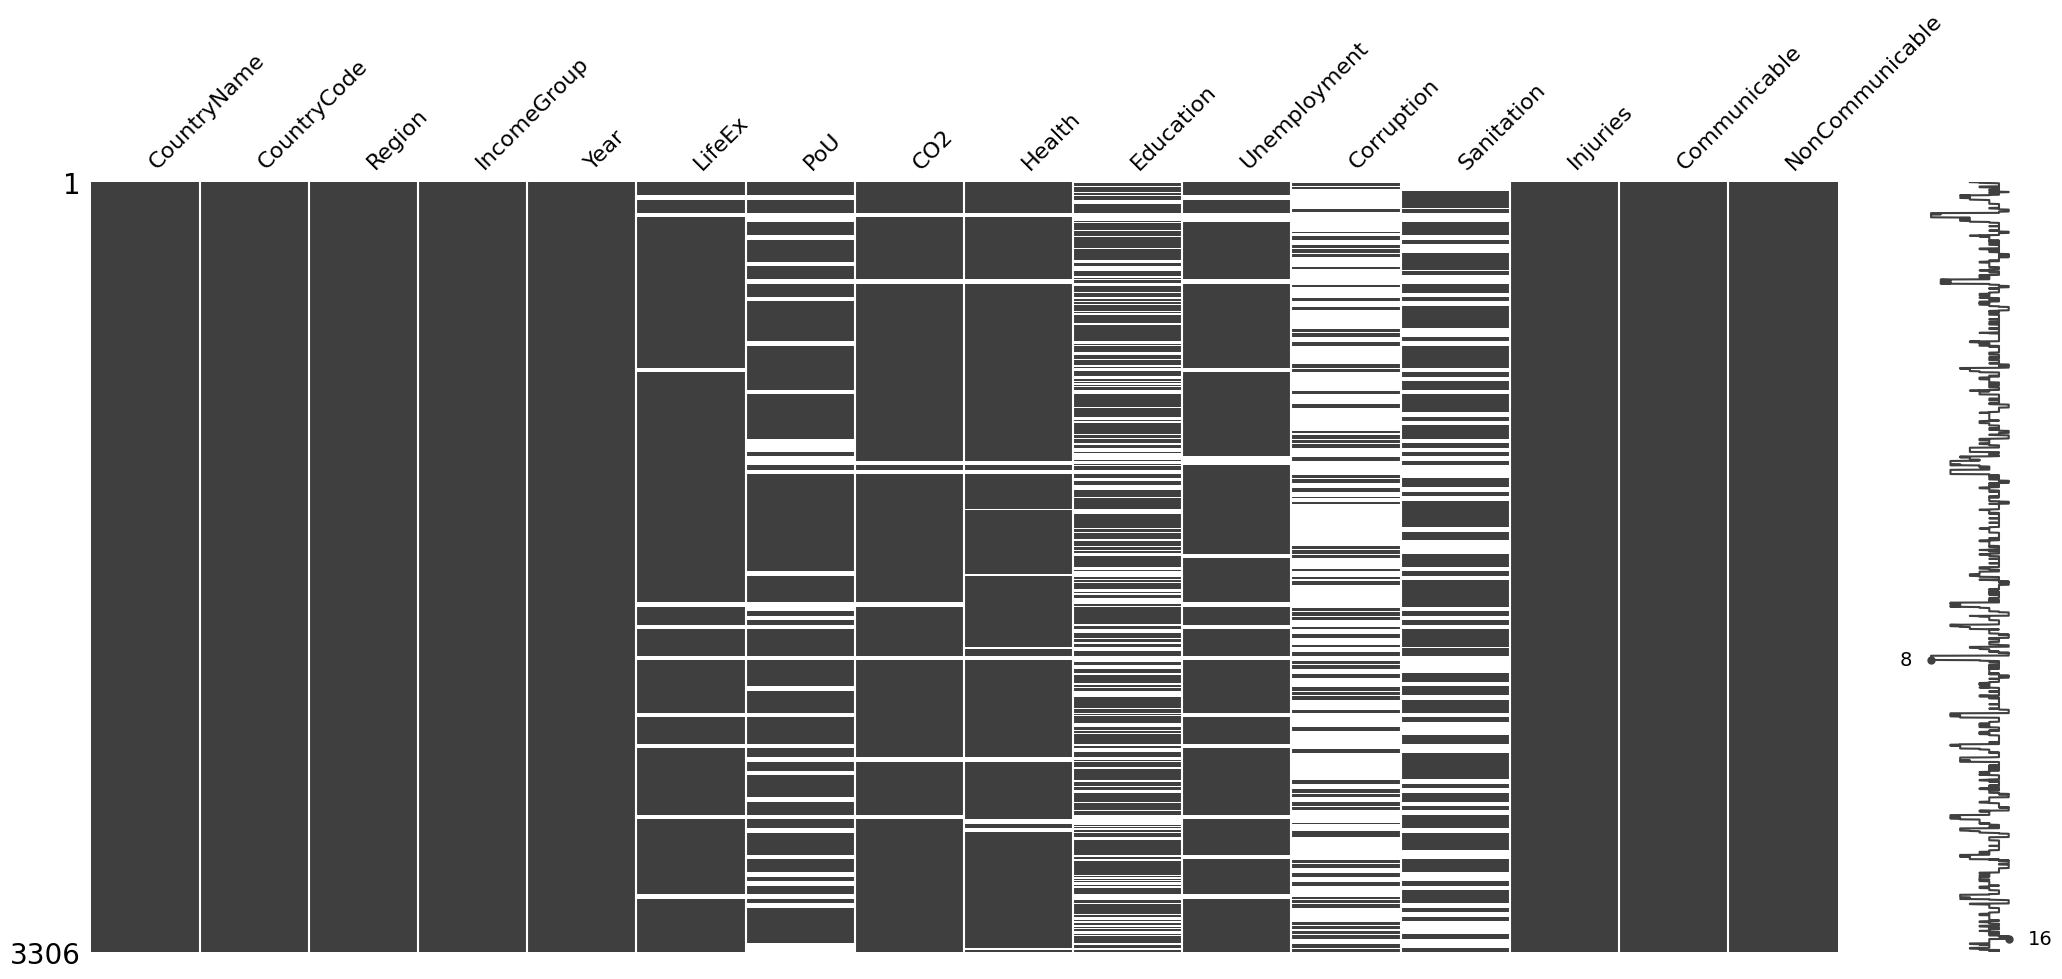

In [168]:
msno.matrix(df_life_exp)
df_life_exp.isna().sum()

There are numerous possibilities to deal with missing values. Although it sounds lazy, sometimes one can just delete a feature or row if it's not worth it to fill the missing values in since the given data is not enough to fill out the missing values correctly. Strong example is the column `Corruption`.

In [169]:
df_life_exp = df_life_exp.drop(['Corruption'], axis=1)

In [170]:
display(df_life_exp[df_life_exp["LifeEx"].isna()]["CountryName"].unique() )

array(['Andorra', 'American Samoa', 'Dominica', 'Monaco',
       'Marshall Islands', 'Northern Mariana Islands', 'Nauru', 'Palau',
       'San Marino', 'Tuvalu'], dtype=object)

In [171]:
for i in df_life_exp[df_life_exp["LifeEx"].isna()]["CountryName"].unique():
    display(len(df_life_exp.loc[(df_life_exp["LifeEx"].isna()) & (df_life_exp['CountryName'] == i)]))


19

19

18

19

19

19

19

18

19

19

Since our target attribute is the life expectancy of each country we decided to not handle the missing values for this attribute, since every country has for almost no year a value. There would have been the option to consider the region of those countries and fill the missing `LifeEx` values with those of similar countries, but we do not think it would give us good data and do not want to train our model on those countries. 

In [172]:
df_life_exp = df_life_exp.loc[~df_life_exp['CountryCode'].isin(df_life_exp[df_life_exp["LifeEx"].isna()]["CountryCode"].unique())]

CountryName           0
CountryCode           0
Region                0
IncomeGroup           0
Year                  0
LifeEx                0
PoU                 513
CO2                  76
Health              142
Education           971
Unemployment        114
Sanitation         1132
Injuries              0
Communicable          0
NonCommunicable       0
dtype: int64

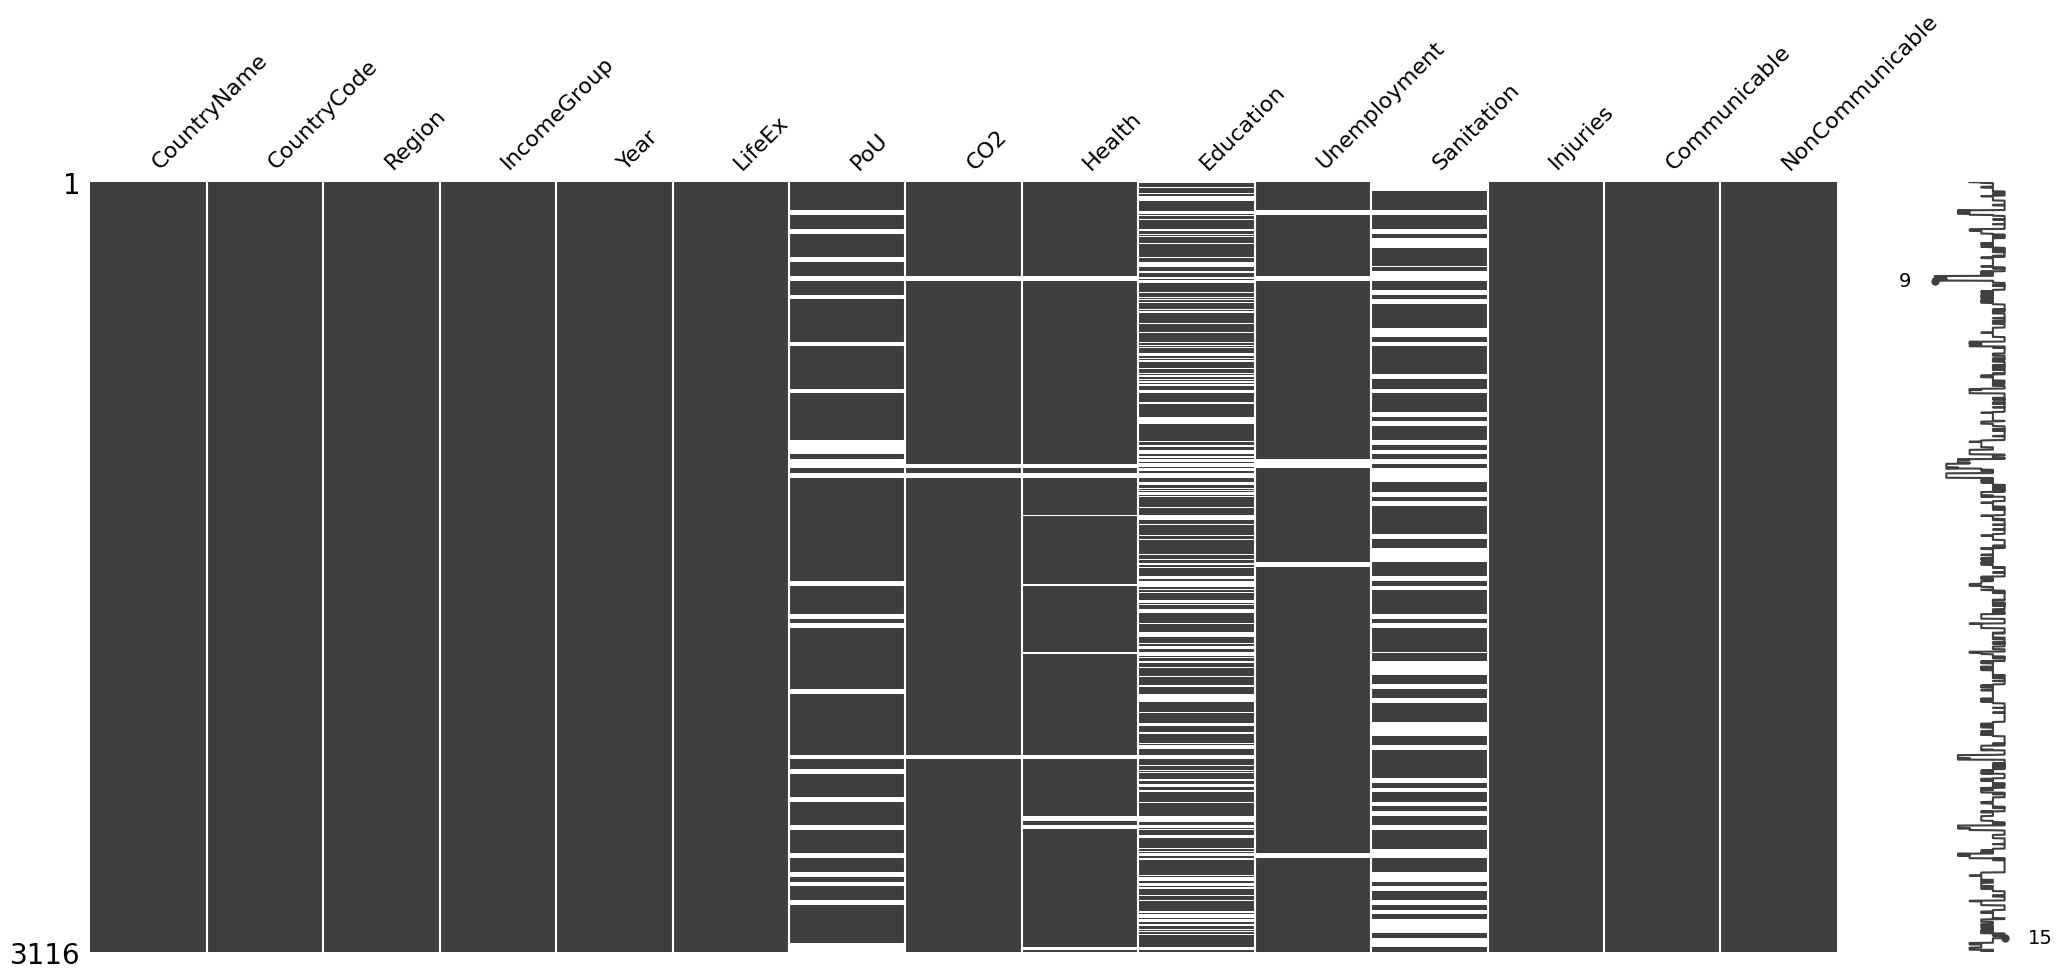

In [173]:
msno.matrix(df_life_exp)
df_life_exp.isna().sum()

In [174]:
display(df_life_exp[df_life_exp["Sanitation"].isna()]["CountryName"].unique())
display(df_life_exp[df_life_exp["Education"].isna()]["CountryName"].unique())
display(df_life_exp[df_life_exp["Health"].isna()]["CountryName"].unique())
display(df_life_exp[df_life_exp["Education"].isna() & df_life_exp["Health"].isna() & df_life_exp["Sanitation"].isna()]["CountryName"].unique())


array(['Afghanistan', 'Angola', 'United Arab Emirates', 'Argentina',
       'Antigua and Barbuda', 'Burundi', 'Benin', 'Burkina Faso',
       'Bosnia and Herzegovina', 'Belize', 'Bermuda', 'Barbados',
       'Botswana', "Cote d'Ivoire", 'Cameroon', 'Comoros',
       'Dominican Republic', 'Eritrea', 'Fiji', 'Gabon', 'Guinea',
       'Equatorial Guinea', 'Grenada', 'Guatemala', 'Guam', 'Guyana',
       'Haiti', 'Indonesia', 'Jamaica', 'Kazakhstan', 'Kenya', 'Cambodia',
       'Liberia', 'Sri Lanka', 'Moldova', 'Maldives', 'Montenegro',
       'Mozambique', 'Mauritania', 'Mauritius', 'Malaysia', 'Namibia',
       'Nicaragua', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea',
       'Rwanda', 'Sudan', 'Solomon Islands', 'El Salvador', 'South Sudan',
       'Eswatini', 'Seychelles', 'Tajikistan', 'Turkmenistan',
       'Trinidad and Tobago', 'Uganda', 'Uruguay', 'Uzbekistan',
       'Vietnam', 'Vanuatu', 'South Africa', 'Zambia'], dtype=object)

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Burundi',
       'Belgium', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', 'Cameroon', 'Comoros', 'Costa Rica', 'Cuba', 'Cyprus',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq',
       'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Cambodi

array(['Afghanistan', 'Albania', 'Bermuda', 'Greenland', 'Guam', 'Iraq',
       'Libya', 'Montenegro', 'Puerto Rico', 'Somalia', 'South Sudan',
       'Zimbabwe'], dtype=object)

array(['Afghanistan', 'Bermuda', 'Guam', 'Montenegro', 'South Sudan'],
      dtype=object)

In [175]:
bad_countries = []
bad_years = []

for attr in ['Sanitation', 'Health', 'Education']:
    for country in df_life_exp['CountryName'].unique():

        temp = df_life_exp.loc[(df_life_exp[attr].isna()) & (df_life_exp['CountryName'] == country)]

        if ((len(temp) > 10) & (country not in bad_countries)):
            bad_countries.append(country)
            bad_years.extend(temp["Year"].unique().tolist())

In [176]:
print(bad_countries)
print(len(bad_countries))

bad_year_counts = {year: bad_years.count(year) for year in list(range(2001, 2020))}
display(bad_year_counts)

['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Burundi', 'Benin', 'Burkina Faso', 'Belize', 'Bermuda', 'Barbados', 'Botswana', "Cote d'Ivoire", 'Cameroon', 'Comoros', 'Dominican Republic', 'Eritrea', 'Fiji', 'Gabon', 'Guinea', 'Equatorial Guinea', 'Grenada', 'Guatemala', 'Guam', 'Guyana', 'Haiti', 'Indonesia', 'Jamaica', 'Kazakhstan', 'Kenya', 'Cambodia', 'Liberia', 'Sri Lanka', 'Moldova', 'Maldives', 'Mozambique', 'Mauritania', 'Mauritius', 'Namibia', 'Nicaragua', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Rwanda', 'Sudan', 'Solomon Islands', 'El Salvador', 'South Sudan', 'Eswatini', 'Seychelles', 'Tajikistan', 'Turkmenistan', 'Trinidad and Tobago', 'Uganda', 'Uruguay', 'Uzbekistan', 'Vietnam', 'Vanuatu', 'South Africa', 'Zambia', 'Greenland', 'Puerto Rico', 'Somalia', 'United Arab Emirates', 'Bosnia and Herzegovina', 'Canada', 'Algeria', 'France', 'Greece', 'Iraq', 'Libya', 'Luxembourg', 'Morocco', 'North Macedonia', 'Montenegro', 'Nigeria', 'Suriname', 'Tonga', 'United St

{2001: 75,
 2002: 75,
 2003: 77,
 2004: 77,
 2005: 77,
 2006: 78,
 2007: 77,
 2008: 76,
 2009: 76,
 2010: 77,
 2011: 78,
 2012: 77,
 2013: 78,
 2014: 77,
 2015: 72,
 2016: 74,
 2017: 71,
 2018: 70,
 2019: 74}

For time series in general is linear interpolation a reasonable method to deal with missing values.

'South Asia'

8

'Sub-Saharan Africa'

44

'Europe & Central Asia'

44

'Middle East & North Africa'

16

'Latin America & Caribbean'

28

'East Asia & Pacific'

21

'North America'

3

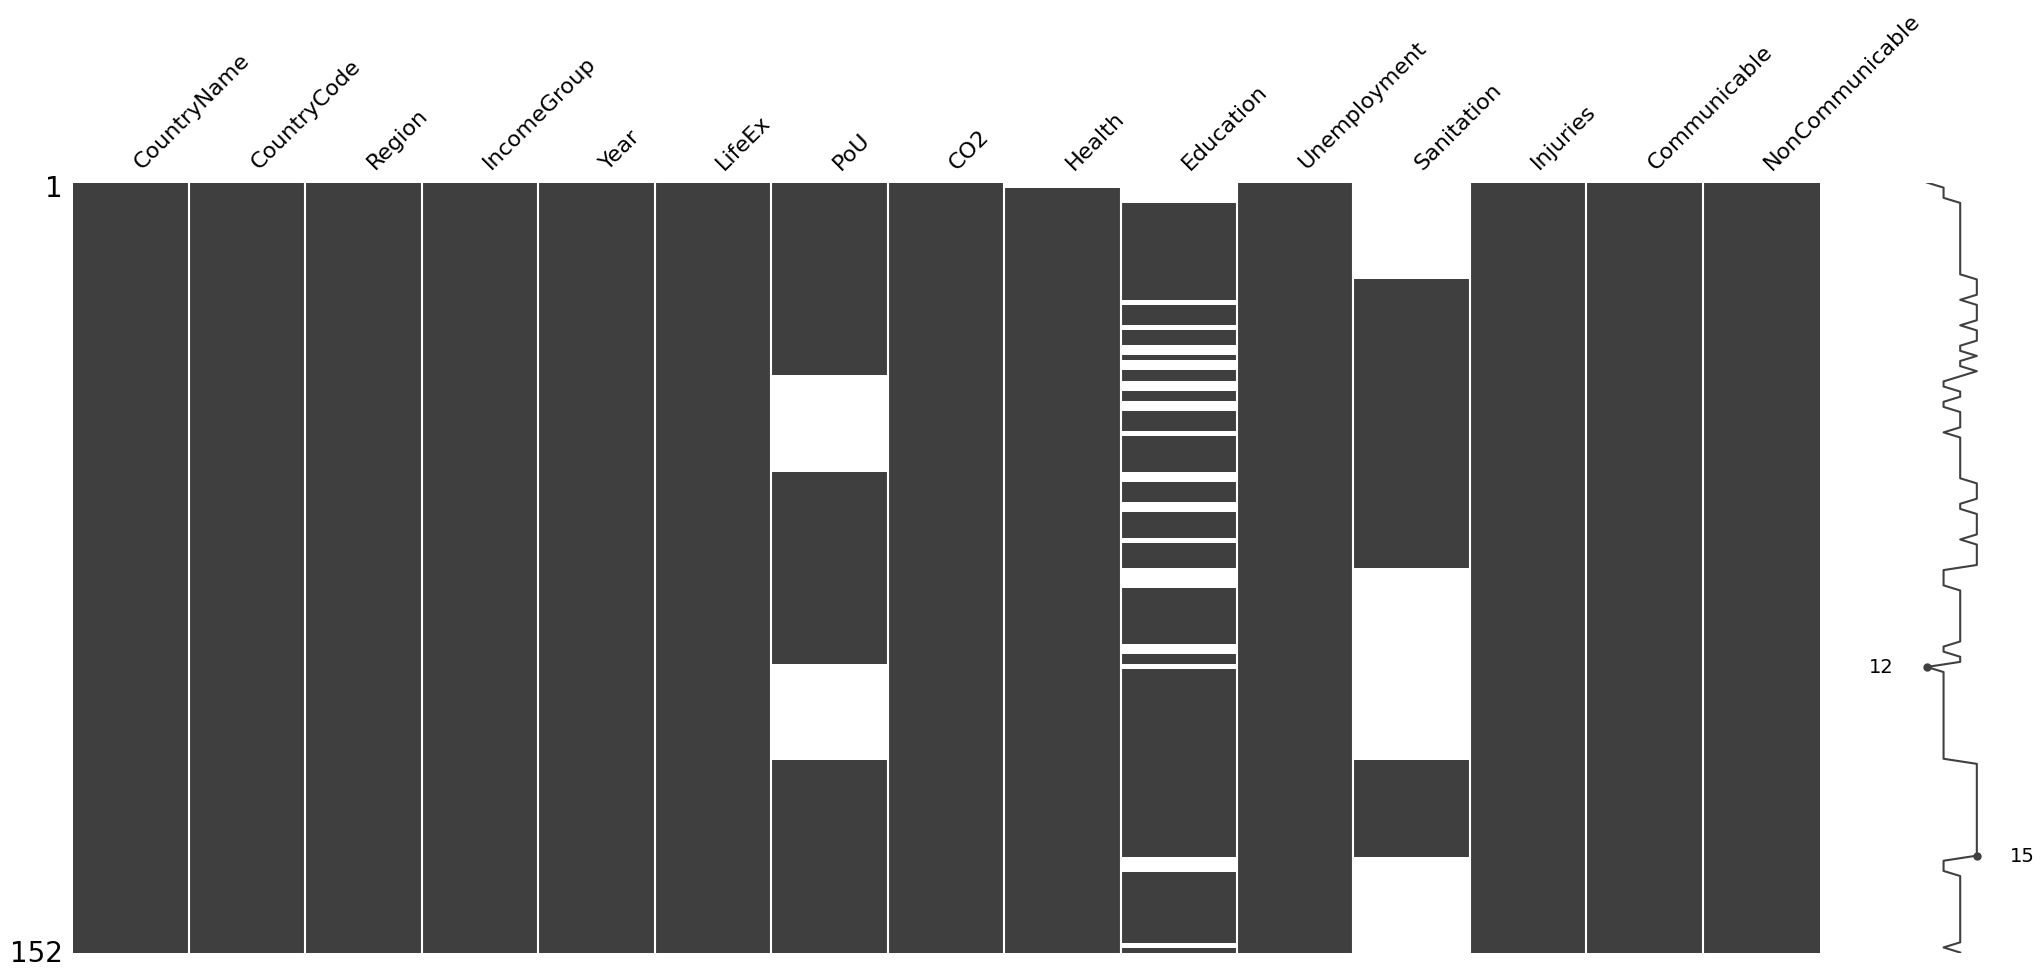

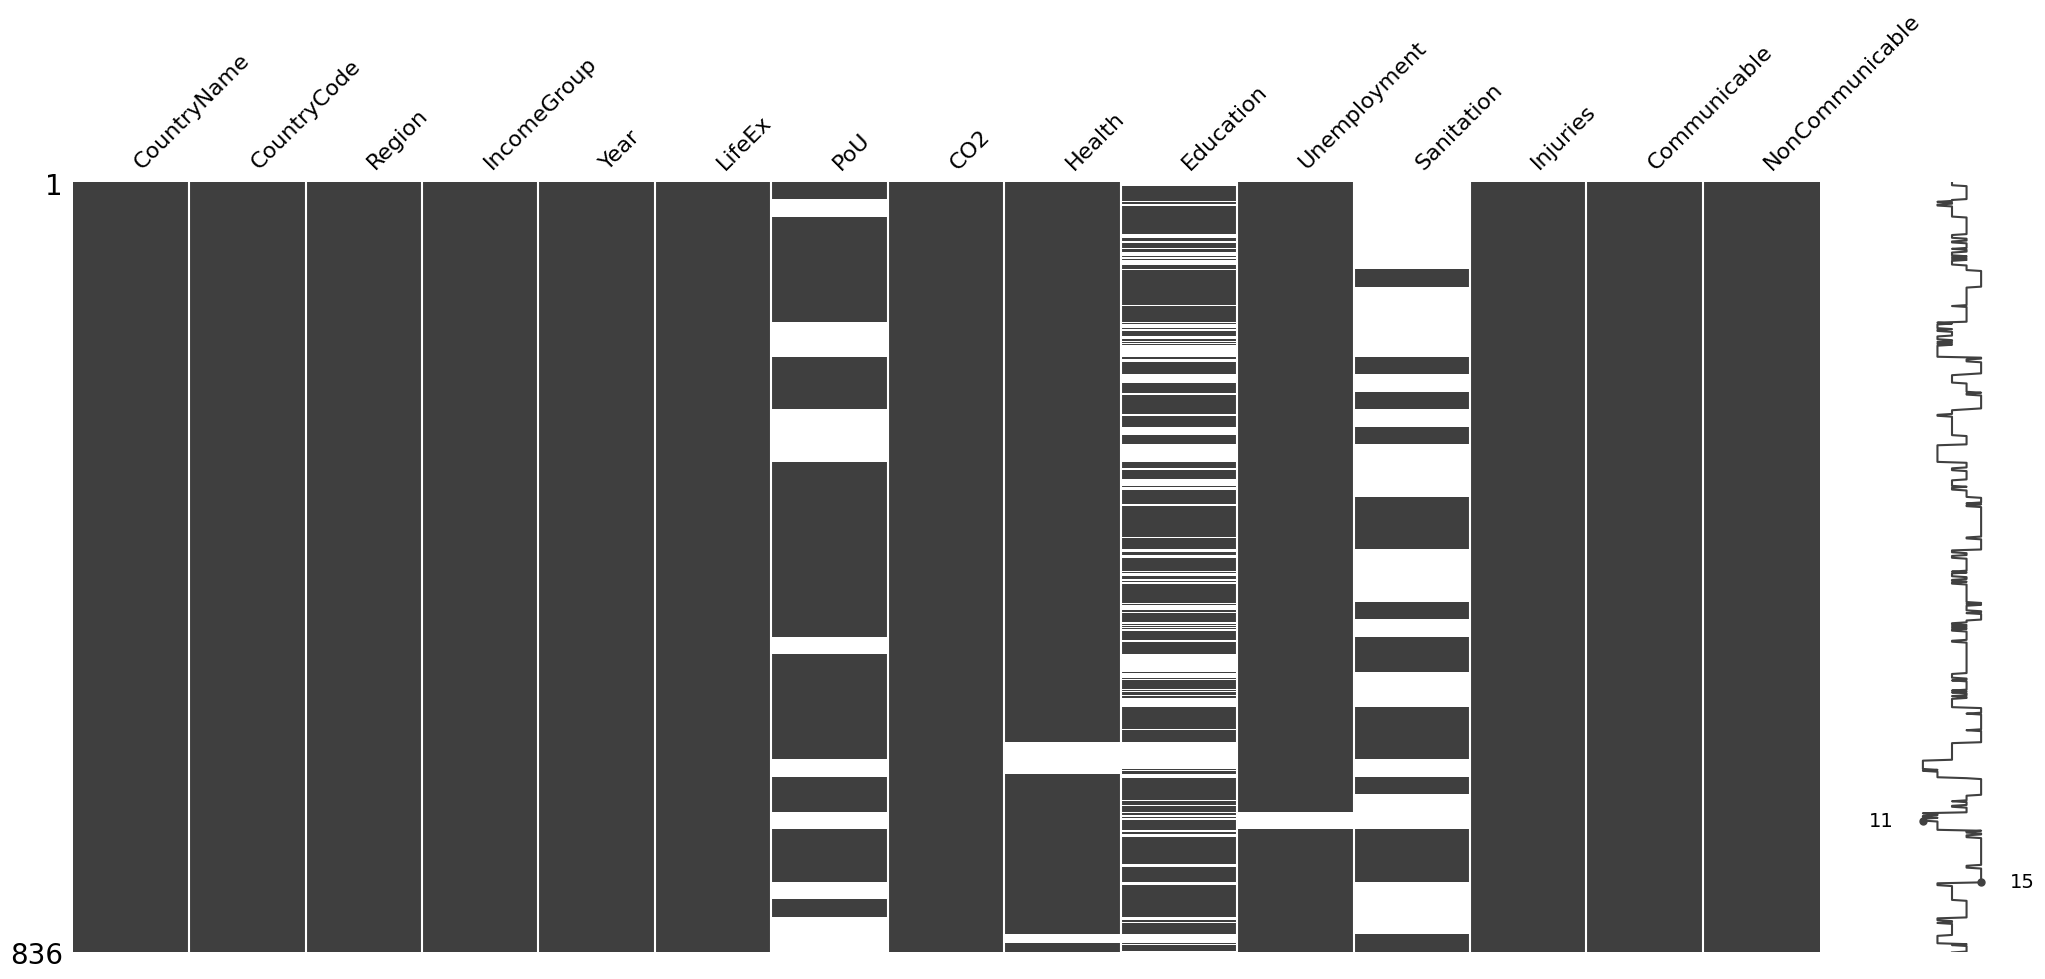

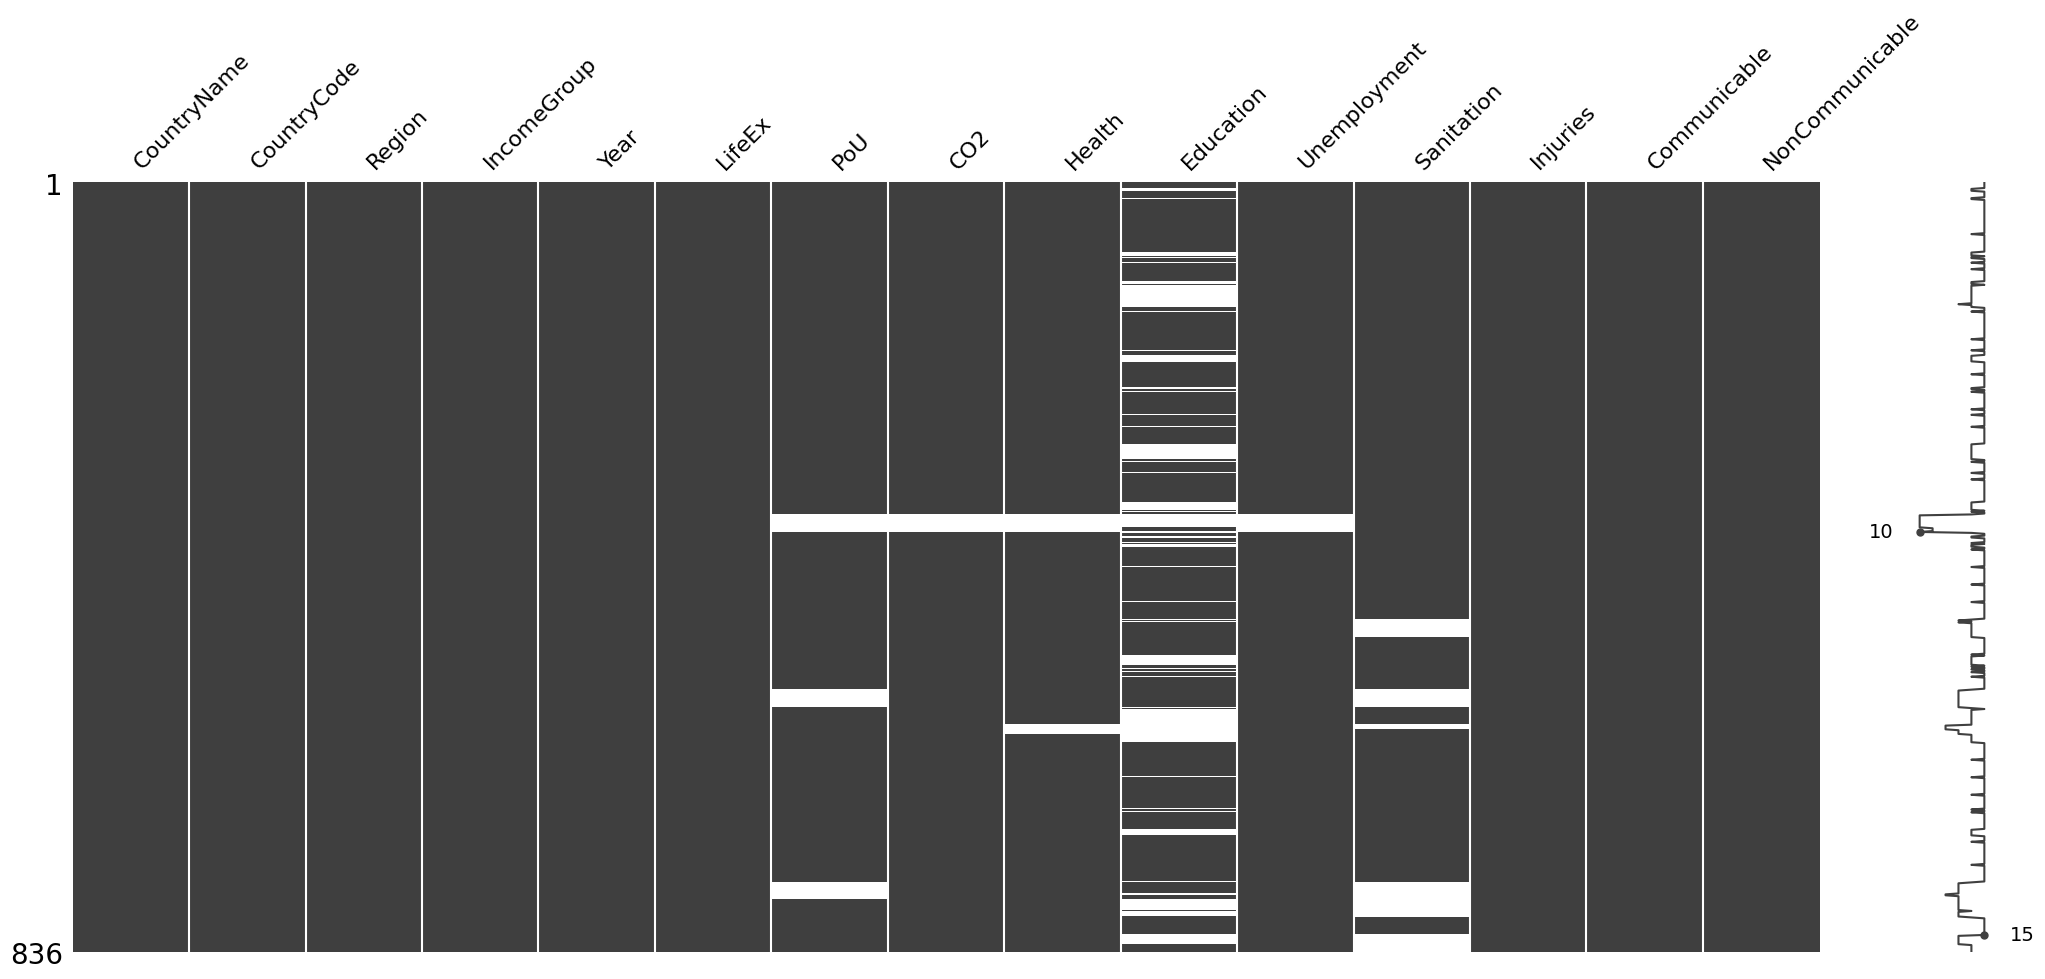

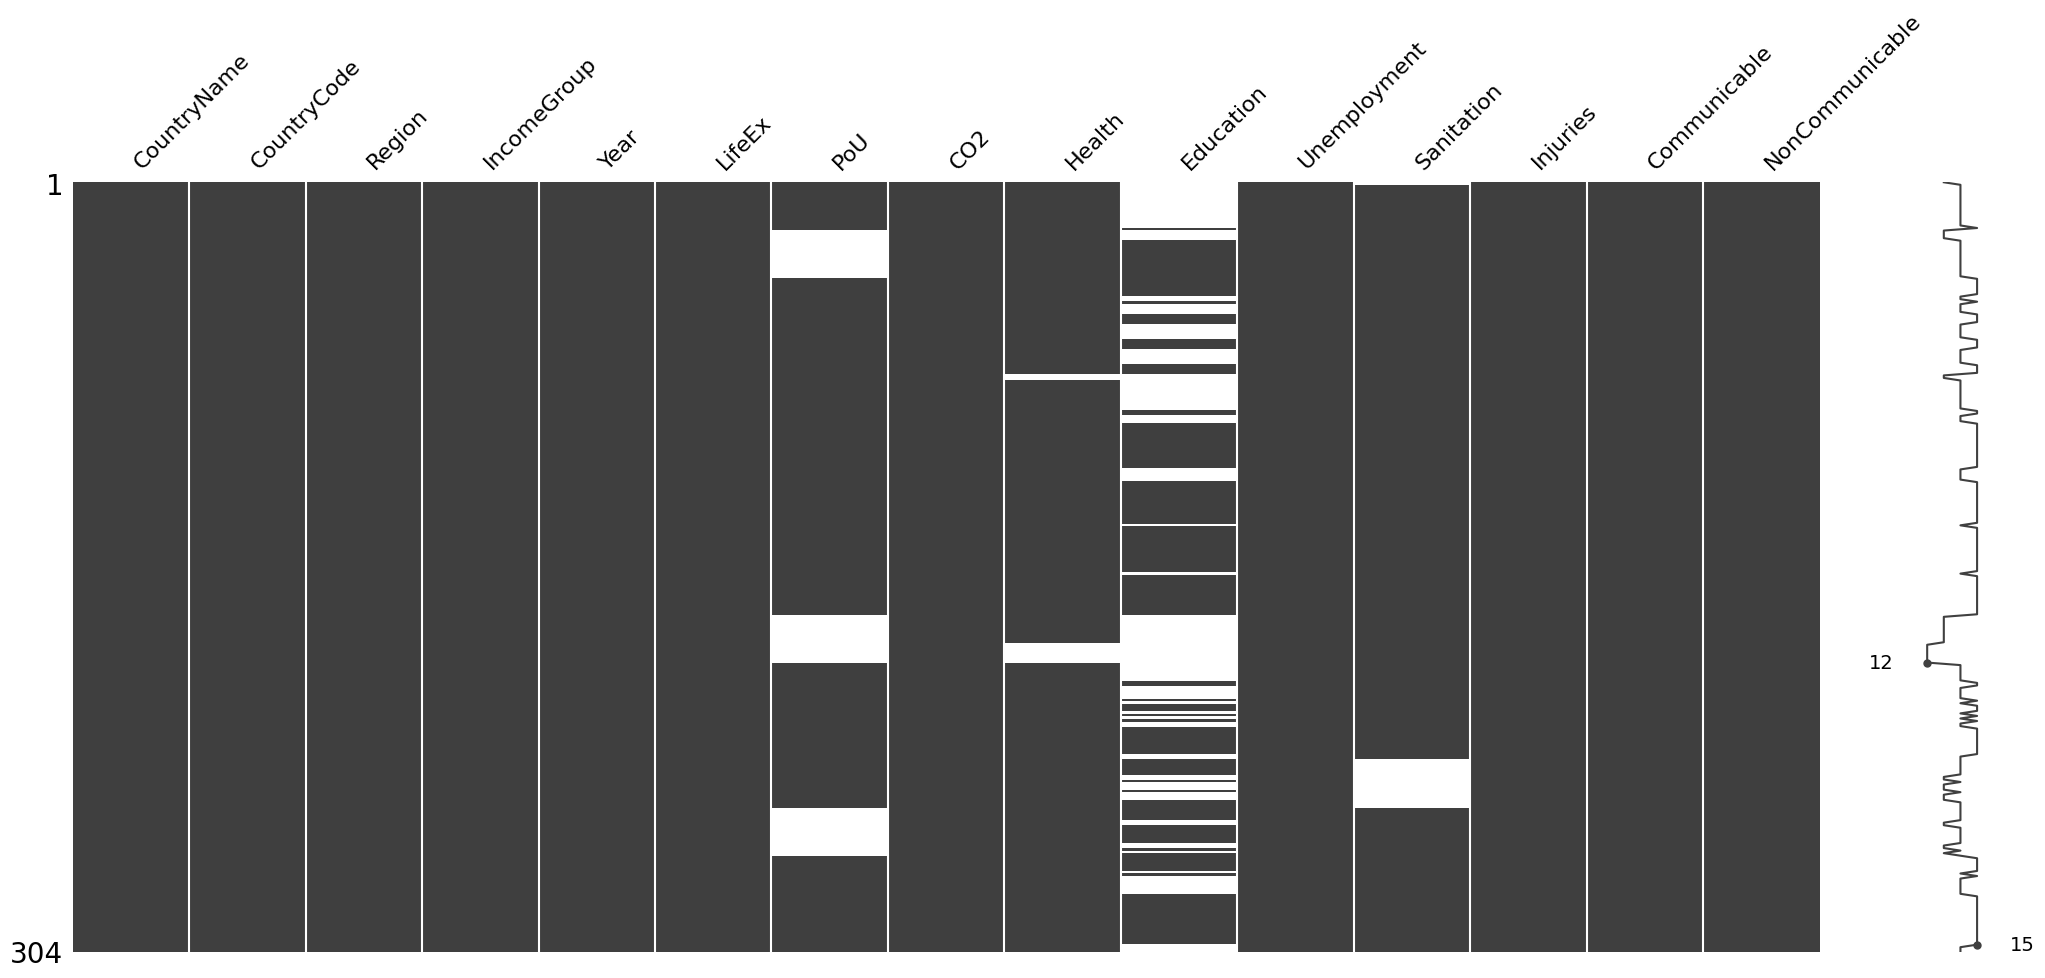

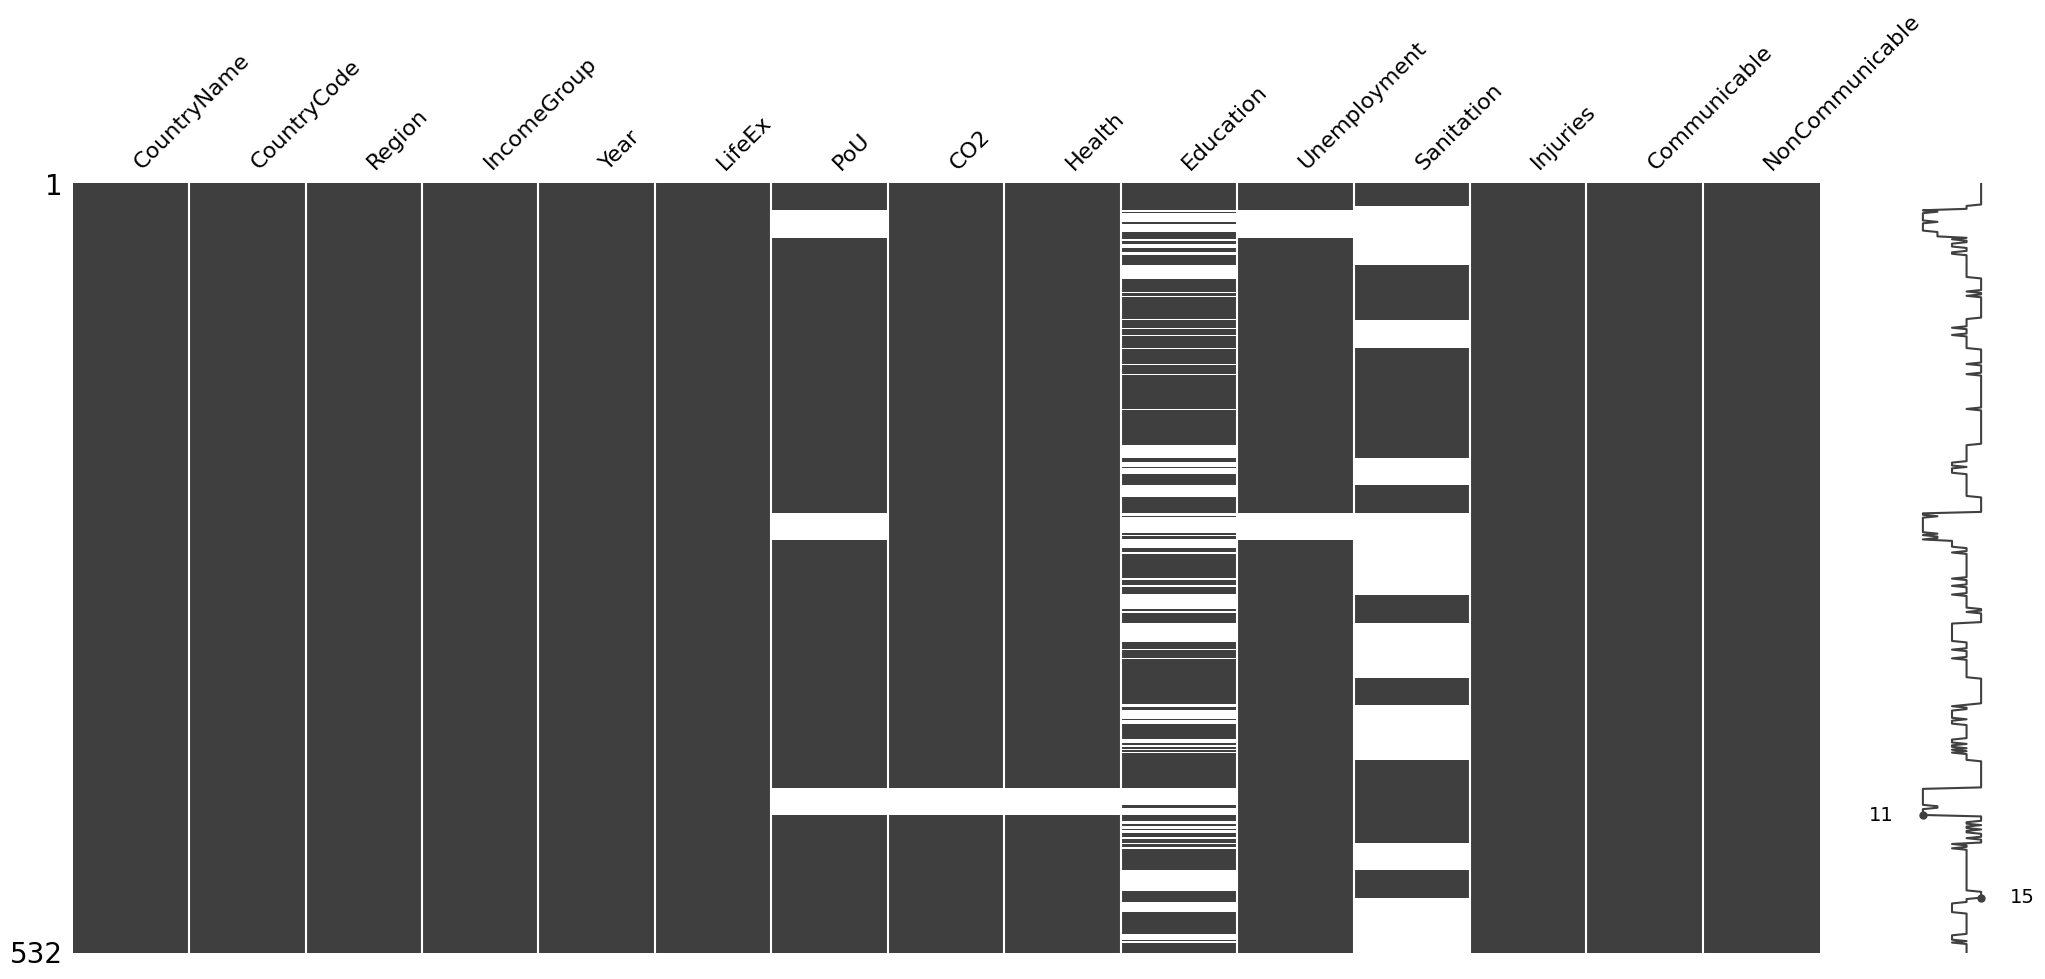

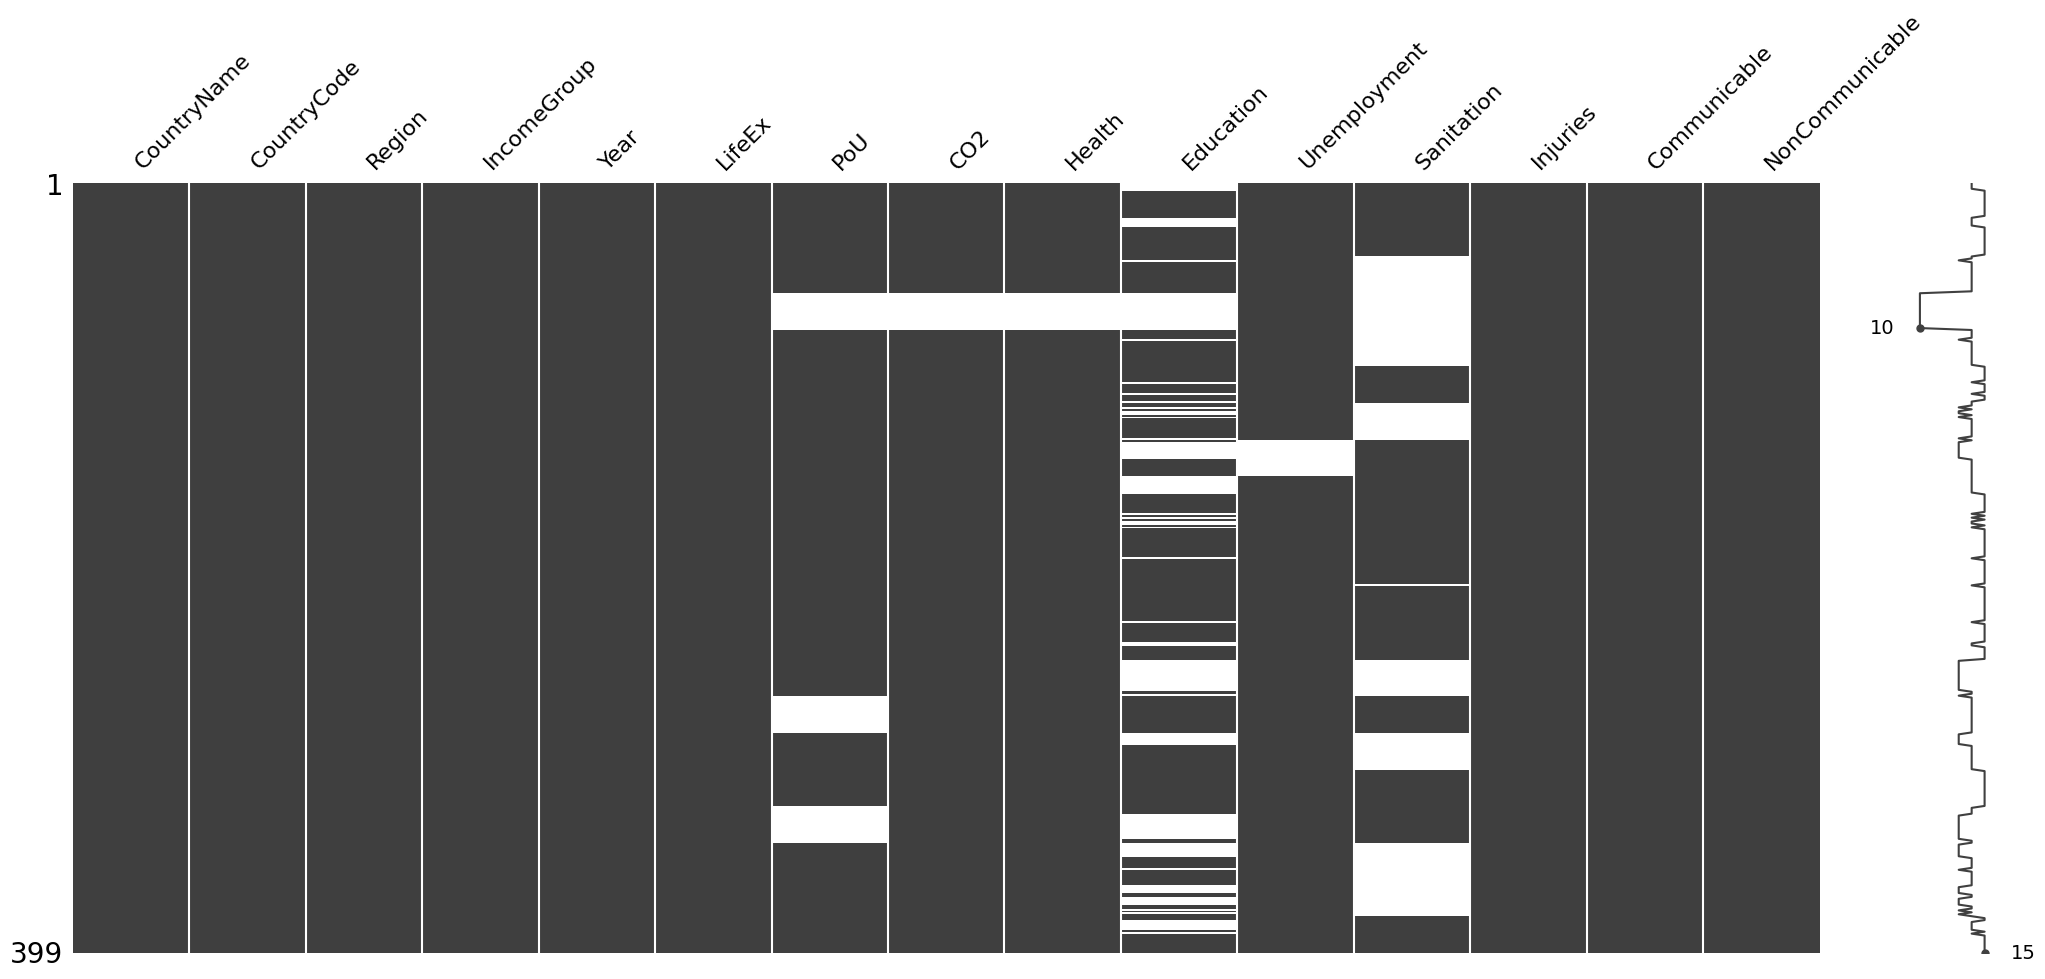

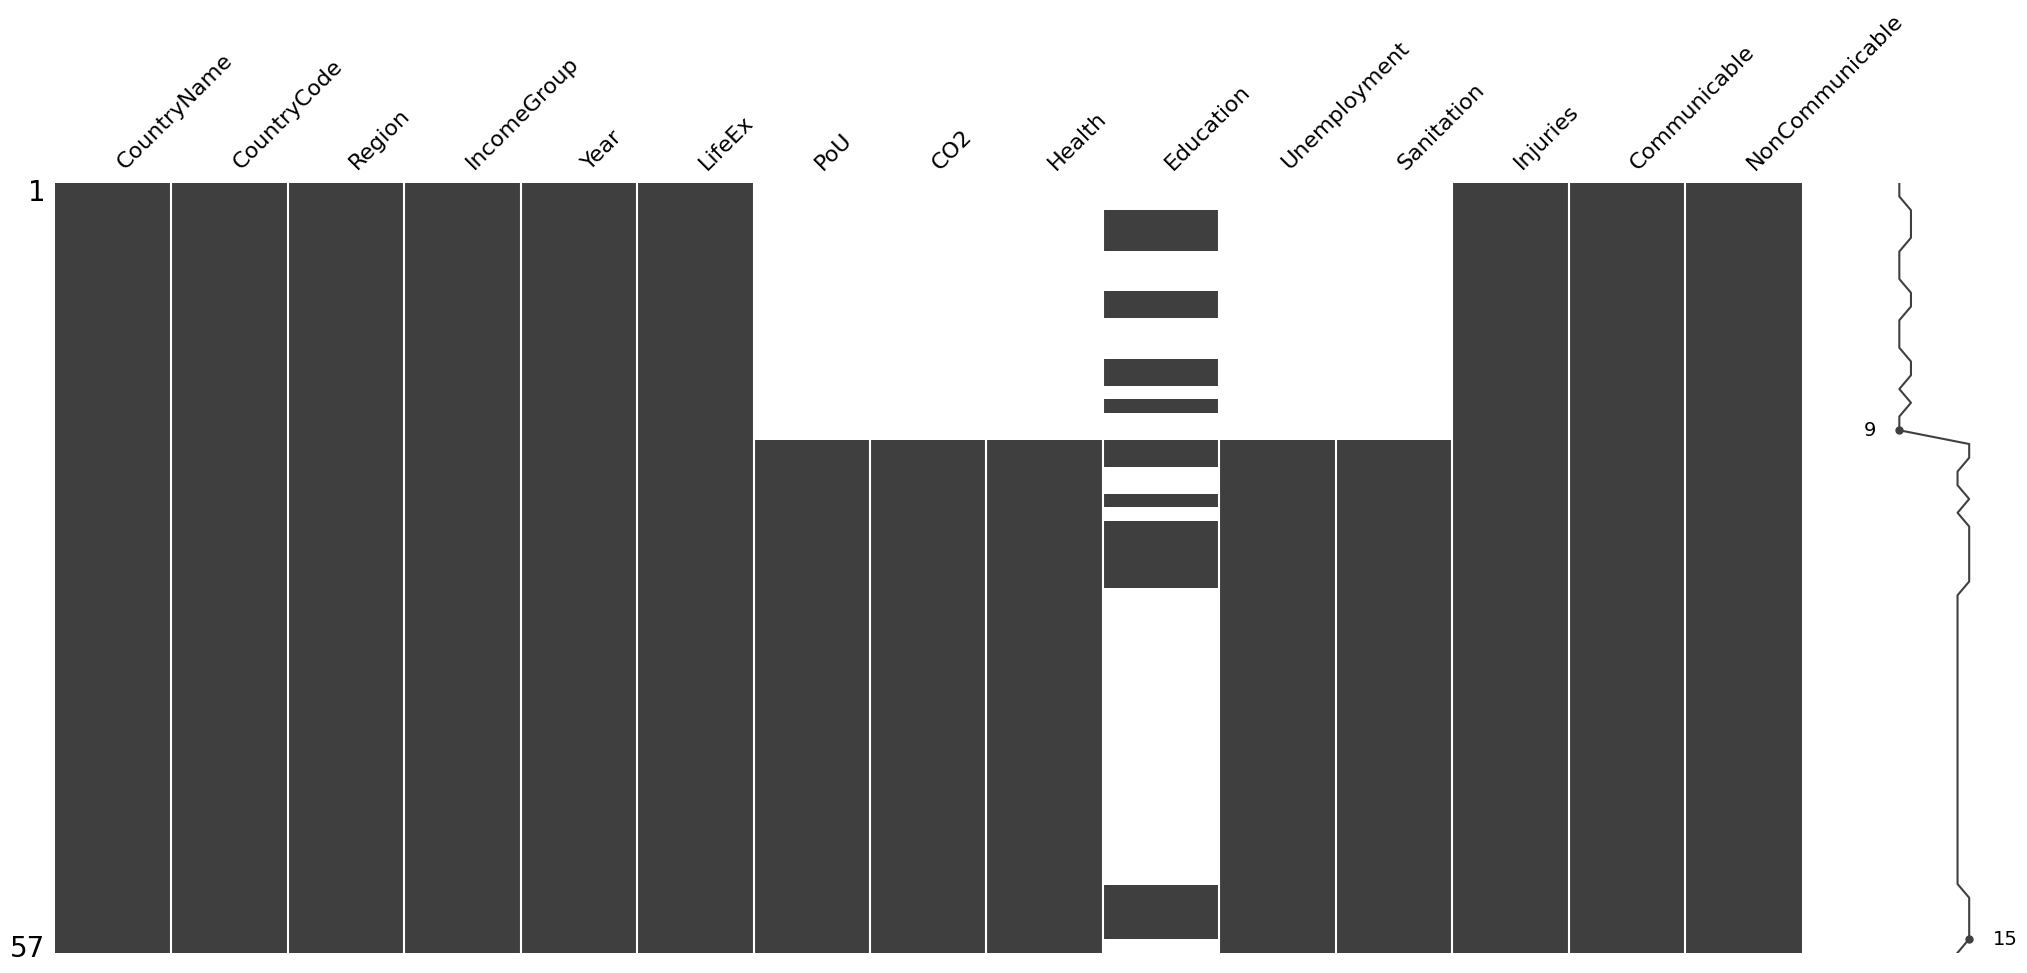

In [177]:
for i in df_life_exp['Region'].unique():
    msno.matrix(df_life_exp[df_life_exp['Region']==i])
    display(i, len(df_life_exp[df_life_exp['Region']==i]['CountryCode'].unique()))

In [178]:
#df_life_exp.set_index(['CountryCode', 'Year'], inplace=True)
#df_life_exp = df_life_exp.sort_index(ascending=True)

### Visualizations

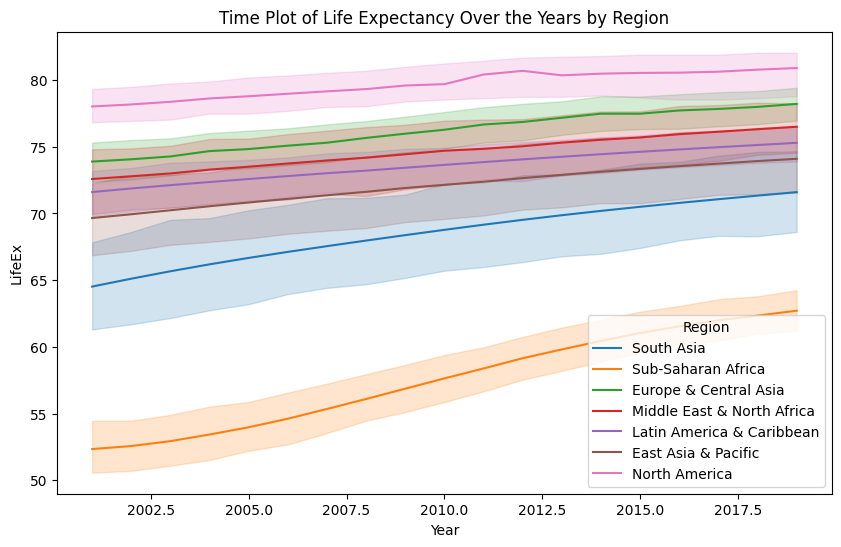

In [180]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='LifeEx', hue='Region', data=df_life_exp)
plt.title('Time Plot of Life Expectancy Over the Years by Region')
plt.show()

In [182]:
corrmat_life_exp = df_life_exp.corr(method='pearson', numeric_only=True)

<Axes: >

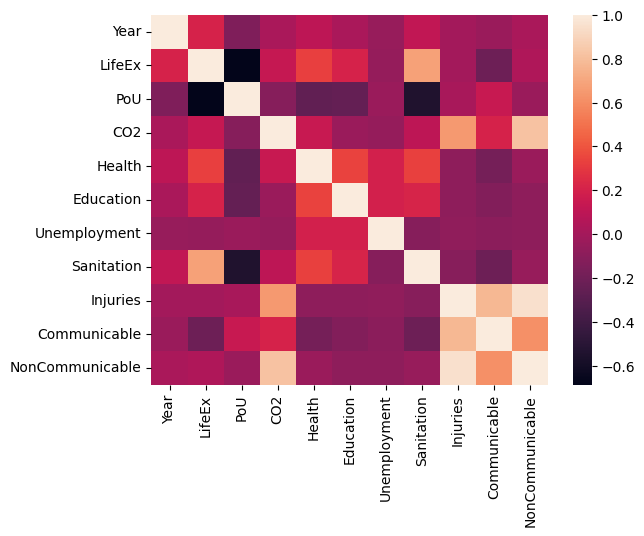

In [183]:
sns.heatmap(corrmat_life_exp)

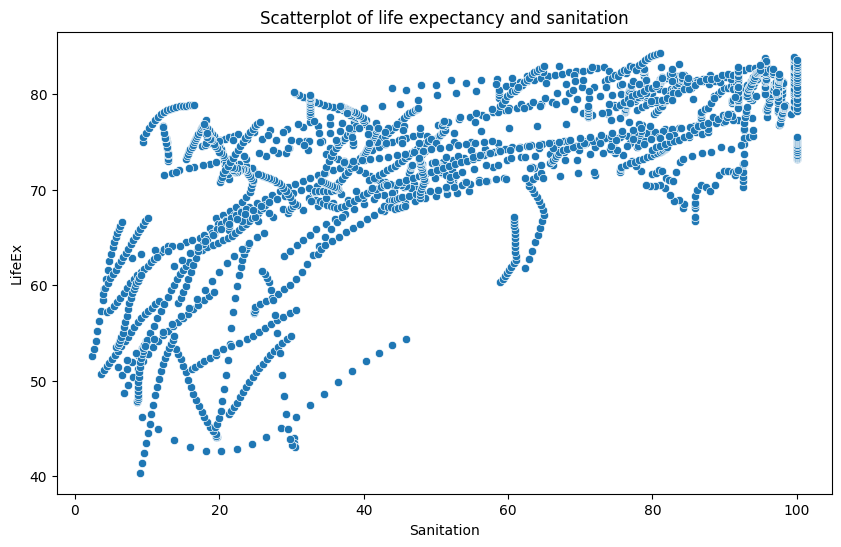

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sanitation', y='LifeEx', data=df_life_exp)
plt.title('Scatterplot of life expectancy and sanitation')
plt.show()

that looks absolutely insane

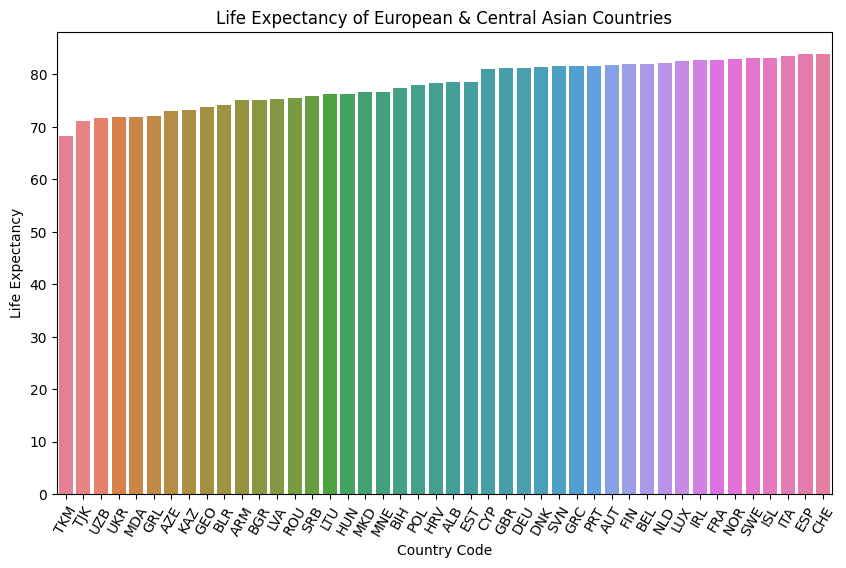

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CountryCode', y='LifeEx', hue='CountryCode', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')].sort_values('LifeEx'))
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'LifeEx'}>,
        <Axes: title={'center': 'PoU'}>],
       [<Axes: title={'center': 'CO2'}>,
        <Axes: title={'center': 'Health'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Sanitation'}>,
        <Axes: title={'center': 'Injuries'}>],
       [<Axes: title={'center': 'Communicable'}>,
        <Axes: title={'center': 'NonCommunicable'}>, <Axes: >]],
      dtype=object)

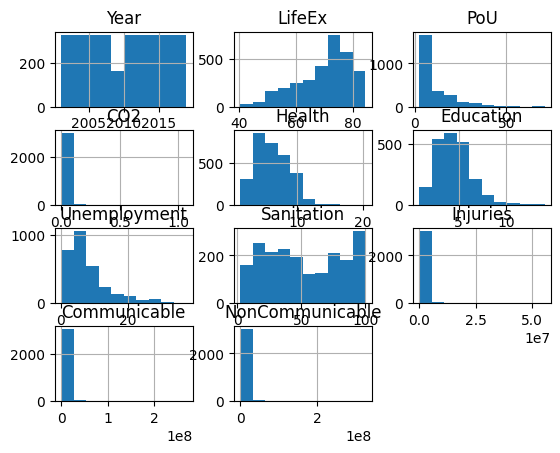

In [187]:
df_life_exp.hist()